In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Epidemiology Model 


# Data 
- 1. COVID-19 US cases: Directly read data from JHU github repo.
- 2. Mobility Data provided by Apple for each county in the U.S.


In [2]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_confirmed_df = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
us_death_df = pd.read_csv(url, error_bad_lines=False)

display(us_confirmed_df.head())
display(us_death_df.head())

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
global_recover_df = pd.read_csv(url, error_bad_lines=False)
display(global_recover_df.head())


url = "https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-m50.csv"
mobility = pd.read_csv(url, error_bad_lines=False)
display(mobility.head())
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2818,2873,2893,2945,2979,3005,3043,3087,3117,3186
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,9051,9163,9341,9501,9626,9728,9821,9974,10087,10288
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1189,1206,1214,1217,1219,1223,1224,1240,1245,1258
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1204,1239,1252,1270,1283,1293,1299,1317,1322,1359
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,3061,3100,3158,3231,3281,3299,3324,3426,3496,3600


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,42,42,42,42,42,42,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,137,137,137,138,138,138,138,141,141,141
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,11,29,29,29,29,29,29,30,30,30
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,18,38,38,38,38,38,39,39,39,40
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,40,43,45,46,46,46,46,46,47,47


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36946,37218,37260,37260,37393,37685,37879,37920,38032,38099
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,19384,19912,20484,20974,21286,21617,22180,22527,23072,23609
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,54405,54990,55538,56079,56617,57146,57648,58146,58146,59135
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5940,5988,6066,6130,6171,6238,6293,6367,6452,6505
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7932,8139,8244,8299,8335,8338,8353,8470,8579,8679


,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-11-29,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,...,5.223,8.351,9.509,9.640,10.284,10.647,9.140,6.831,8.801,10.229
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,...,4.468,9.436,12.719,11.212,12.898,13.569,9.145,5.962,10.742,13.429
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,...,6.200,9.038,9.898,9.888,10.128,10.967,9.482,7.307,9.089,10.487
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,...,6.310,7.758,9.696,8.324,9.774,8.924,8.462,7.540,8.888,9.557
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,...,7.174,13.373,15.405,15.750,18.180,19.944,14.295,10.838,14.730,18.905


In [3]:
us_confirmed_df.loc[~us_confirmed_df["FIPS"].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2818,2873,2893,2945,2979,3005,3043,3087,3117,3186
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,9051,9163,9341,9501,9626,9728,9821,9974,10087,10288
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1189,1206,1214,1217,1219,1223,1224,1240,1245,1258
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1204,1239,1252,1270,1283,1293,1299,1317,1322,1359
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,3061,3100,3158,3231,3281,3299,3324,3426,3496,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,84056037,US,USA,840,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,...,1903,1934,2024,2077,2098,2112,2176,2200,2245,2281
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,1655,1678,1693,1724,1739,1785,1810,1822,1834,1852
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,1089,1121,1149,1175,1187,1198,1221,1237,1250,1271
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,468,487,497,518,520,546,556,577,586,596


# Key variables of Epidemiology Model
- I, the number of infected, is in the `us_comfirmed`
- S, susceptible to COVID-19, is in `us_population` - `us_confirmed`, denoted as `us_susceptible`
- R, removed, is the sum of recovered and deceased. 
- N, population

## Parameters
- Beta: the infection rate
- D: number of days a patient can stay infected

## Goal
- With existing knowledge of I,S,R,and N, use gradient descent to figure out $\theta$ = ($\beta$, D)

In [4]:
# Data Preparation
us_confirmed = us_confirmed_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
us_death = us_death_df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
us_recovered = global_recover_df.loc[global_recover_df["Country/Region"] == "US"].drop(
    ["Province/State","Country/Region","Lat","Long"],axis= 1).values[0]
#us_removed = us_recovered+us_death
us_removed = us_recovered+us_death
#us_population = us_death_df.Population.sum()
us_population = 1e7
us_infected = us_confirmed 
us_susceptible = us_population - us_infected

#test data
us_removed = us_removed[0:100]
us_susceptible = us_susceptible[0:100]
us_infected = us_infected[0:100]

In [5]:
def get_county(start,days,county_code = 1001):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.FIPS == county_code].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.FIPS == county_code].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.FIPS ==county_code].Population.sum()
    county_infected = county_confirmed
    county_removed = county_death
    county_susceptible = county_population - county_infected
    return county_susceptible[start:days+start],county_infected[start:start+days],county_removed[start:start+days],county_population
def get_state(start,days,state_name = "Washington"):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.Province_State == state_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.Province_State == state_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.Province_State ==state_name].Population.sum()
    county_infected = county_confirmed
    county_removed = county_death
    county_susceptible = county_population - county_infected
    return county_susceptible[start:start + days],county_infected[start:start + days],county_removed[start:days+start],county_population
def get_country(start,days,country_name = "US"):
    
    county_confirmed = us_confirmed_df.loc[us_confirmed_df.Country_Region == country_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key'],axis=1).sum(axis=0).values
    county_death = us_death_df.loc[us_death_df.Country_Region == country_name].drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
           'Country_Region', 'Lat', 'Long_', 'Combined_Key',"Population"],axis=1).sum(axis=0).values
    county_population = us_death_df.loc[us_death_df.Country_Region ==country_name].Population.sum()
    country_recovered = global_recover_df.loc[global_recover_df["Country/Region"] == country_name].drop(
    ["Province/State","Country/Region","Lat","Long"],axis= 1).values[0]
    county_infected = county_confirmed
    county_removed = county_death + country_recovered
    county_susceptible = county_population - county_infected
    return county_susceptible[start:start+days],county_infected[start:start+days],county_removed[start:start+days],county_population


## Gradient Descent to solve for $\beta$ and $\frac{1}{D}$

Given: 
$\begin{align*}
  &\xi = \frac{1}{D} \\
  &f_s(I_n,N,S_n) = -\beta\left(\frac{I_n}{N}\right) S_n, \\
  &f_I(I_n,N,S_n) = - I\xi + \beta\left(\frac{I_n}{N}\right) S_n,  \\
  &f_R(I_n) = I_n\xi, \\
  &h=1
\end{align*}
$

Plug the above values into
$\frac{1}{N} \sum_{n=1}^N \nabla_{\theta} \left( \left({\frac{s(n+1)-s(n)}{h} - f_s(s(n), I(n), R(n);\theta)}\right)^2
+ \left({\frac{I(n+1)-I(n)}{h} - f_I(s(n), I(n), R(n;\theta)}\right)^2 + \dots \right)$

To calculate the above the term, we need to use __chain rule__ to differentiate with respect to $\beta$ and $\xi$

$\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$



## Tuning
First initialize $\theta$ at $\beta = 0.2 $ and $\xi = 0.1$


Then, at each iteration update $\beta$ and $\xi$ according to the rules below


$\beta_{k+1} = \beta_k - h_G \partial_\beta L(\theta|s(1),\dots,s(N)),$


$
\xi_{k+1} = \xi_k - h_G \partial_\xi L(\theta|s(1),\dots,s(N)).$
 where $h_G = 0.001$
 


0.22506571898726158
198.98643140963043


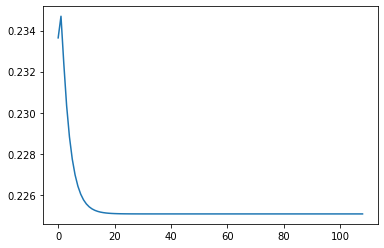

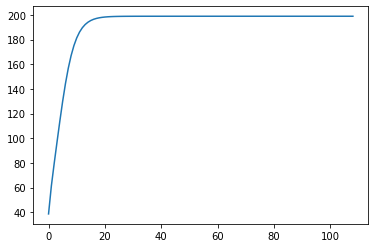

In [6]:
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]
def calculate_gradient(s,i,r,population,beta,epsilon):
    result1 = 0 #continue adding to solve for beta
    result2 = 0 #continue adding to solve for 1/D aka epsilon
    for n in range(len(s)-1):
        result1 += 2*(s[n+1]-s[n]+beta*s[n]*(i[n]/population))*(s[n]*i[n]/population)
        result1 += 2*(i[n+1]-i[n]-beta*s[n]*(i[n]/population) + i[n]*epsilon)*(-s[n]*i[n]/population)
        
        result2 += 2*(i[n+1]-i[n]+i[n]*epsilon-beta*i[n]*s[n]/population)*(i[n])
        result2 += 2*(r[n+1]-r[n]-i[n]*epsilon)*(-i[n])
        
    return result1,result2
def calculate(s,i,r,population,learning_rate1,learning_rate2):
    beta = 0.2
    epsilon = 1/14
    
    loss = 0
    length = len(s)
    betas = []
    ds = []
    
    for itera in range(1000): # do it for 10 iterations.
        
        loss1,loss2 = calculate_gradient(s,i,r,population,beta,epsilon)
        beta_new = beta - learning_rate1* loss1/length #0.001 is the learning rate
        epsilon_new = epsilon - learning_rate2 * loss2/length
        if (beta_new == beta) & (epsilon_new == epsilon):
            print(beta_new)
            print(1/epsilon_new)
            break
        beta = beta_new
        epsilon = epsilon_new
        betas.append(beta)
        ds.append(1/epsilon)

    return betas,ds


if __name__ == "__main__":
    county_code = 1005
    
    #s,i,r,p = get_county(70,1003)
    #s,i,r,p = get_state(20,40,"Washington")
    s,i,r,p = get_country(30,37)    
    learning_rate1 = 1e-3/p*60
    learning_rate2= 1e-3/p*60
    betas,ds = calculate(s,i,r,p,learning_rate1,learning_rate2)
    plt.plot(betas)
    plt.show()
    plt.plot(ds)
    plt.show()

In [7]:
import math
math.isnan(np.nan)

True

0.19796775459553587
421.8788611024683


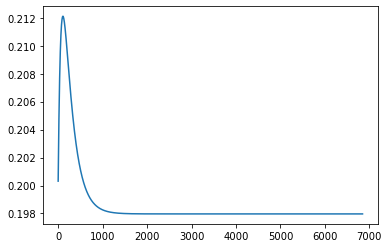

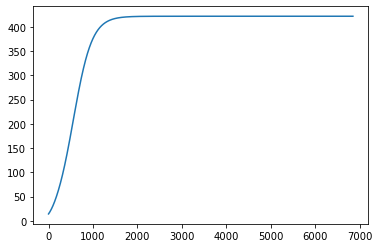

In [8]:
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]
def calculate_gradient(s,i,r,population,beta,epsilon):
    result1 = 0 #continue adding to solve for beta
    result2 = 0 #continue adding to solve for 1/D aka epsilon
    for n in range(len(s)-1):
        result1 += 2*(s[n+1]-s[n]+beta*s[n]*(i[n]/population))*(s[n]*i[n]/population)
        result1 += 2*(i[n+1]-i[n]-beta*s[n]*(i[n]/population) + i[n]*epsilon)*(-s[n]*i[n]/population)
        
        result2 += 2*(i[n+1]-i[n]+i[n]*epsilon-beta*i[n]*s[n]/population)*(i[n])
        result2 += 2*(r[n+1]-r[n]-i[n]*epsilon)*(-i[n])
        
    return result1,result2
def calculate_using_gridsearch(s,i,r,population,learning_rate1,learning_rate2):
    beta = 0.2
    epsilon = 1/14
    
    
    for x in range(100): # dangerous, recommend do a for loop!!! 
        loss = 0
        length = len(s)
        betas = []
        ds = []
        
        middle_rate = (learning_rate2 + learning_rate1)/2 + (learning_rate2 - learning_rate1)/3
        #First we get the middle learning rate and test its performance
        # if it works, great!
        # if returns NaNs, then we move to the left portion of the range
        # if returns a list (doesn't converge), then we move to the right portion of the range
        for itera in range(10000):
            loss1,loss2 = calculate_gradient(s,i,r,population,beta,epsilon)
            beta_new = beta - middle_rate* loss1/length #0.001 is the learning rate
            epsilon_new = epsilon - middle_rate * loss2/length
            if (beta_new == beta) & (epsilon_new == epsilon):
                print(beta_new)
                print(1/epsilon_new)
                plt.plot(betas)
                plt.show()
                plt.plot(ds)
                plt.show()
                return beta_new,1/epsilon_new
            # if middle point gives nan, then we should move to the lower portion
            if math.isnan(beta_new) | math.isnan(epsilon_new):
                learning_rate2 = middle_rate
                break
            beta = beta_new
            epsilon = epsilon_new
            betas.append(beta_new)
            ds.append(1/epsilon_new)
        if math.isnan(beta_new) | math.isnan(epsilon_new):
            # if middle is nans, we move to the left portion
            print("middle = left part")
            print(middle_rate)
        else: # if the middle is not converging, we move to the right portion
            learning_rate1 = middle_rate
            print("middle = right part")
            
        # Middle Point
        
            
            
    print(middle_rate)
    return betas,ds


if __name__ == "__main__":
    county_code = 1005
    
    #s,i,r,p = get_county(20,70,1003)
    s,i,r,p = get_state(20,40,"California")
    #s,i,r,p = get_country(30,37)    
    lr_upper = 1/p
    lr_lower = 1e-20/p
    betas,ds = calculate_using_gridsearch(s,i,r,p,lr_lower,lr_upper)
    #plt.plot(betas)
    #plt.show()
    #plt.plot(ds)
    #plt.show()

 ## Tuning learning rate
 $\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta_{k} S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$


 The Hessian matrix will look like the following:
$ \begin{bmatrix}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &  \frac{\partial \nabla_{\xi}}{\partial_{\beta}}\\
\frac{\partial \nabla_{\beta}}{\partial_{\xi}} & \frac{\partial \nabla_{\xi}}{\partial \xi}
\end{bmatrix}$

We can calculate the hessian matrix given s,i arrays and population 

 $
 \begin{aligned}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2 + 2\cdot \left(S_{n} \cdot \frac{I_{n}}{N}\right) ^2\right) \\
 &= \frac{1}{N} \sum_{n=1}^N \left(4\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2\right) 
  \end{aligned}$
 
  $\begin{aligned}
  \frac{\partial \nabla_{\xi}}{\partial \xi} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot I_{n} ^2 + 2\cdot I_{n} ^2\right) \\
  &= \frac{1}{N} \sum_{n=1}^N  4\cdot I_{n} ^2
  \end{aligned}$
  
   $
 \begin{aligned}
 \frac{\partial \nabla_{\xi}}{\partial_{\beta}} &=  \frac{1}{N} \sum_{n=1}^N -2 \cdot S_{n}\cdot \frac{I_{n}^2}{N} \\
 & = \frac{\partial \nabla_{\beta}}{\partial_{\xi}}
  \end{aligned}$
  
  

  
We then use numpy.lin.eg to get the eigen value of the hessian matrix

In [9]:
def calculate_hessian(s,i,r,population):
    result_beta_second = 0
    result_epsilon_second = 0
    result_both_second = 0
    for n in range(len(s)-1):
        result_beta_second += 4*(s[n] * i[n]/population) **2 
        result_epsilon_second += 4*i[n]
        result_both_second += -2*s[n]*i[n]**2/population
    return result_beta_second/len(s),result_epsilon_second/len(s),result_both_second/len(s)
        
        
top_left,bottom_right,the_other_two = calculate_hessian(s,i,r,p)

In [10]:
np.array([[top_left, the_other_two], [the_other_two, bottom_right]])

array([[ 454662.01789813, -227336.30440591],
       [-227336.30440591,     656.        ]])

In [12]:
from numpy import linalg as LA

In [44]:
1/lip_constant

1.1177380124029609e-10

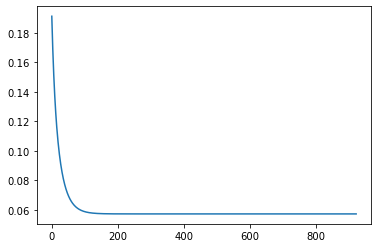

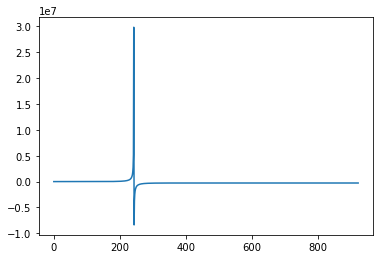

0.05721740888166258
-272783.71318338043


In [50]:
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]
def calculate_gradient(s,i,r,population,beta,epsilon):
    result1 = 0 #continue adding to solve for beta
    result2 = 0 #continue adding to solve for 1/D aka epsilon
    for n in range(len(s)-1):
        result1 += 2*(s[n+1]-s[n]+beta*s[n]*(i[n]/population))*(s[n]*i[n]/population)
        result1 += 2*(i[n+1]-i[n]-beta*s[n]*(i[n]/population) + i[n]*epsilon)*(-s[n]*i[n]/population)
        
        result2 += 2*(i[n+1]-i[n]+i[n]*epsilon-beta*i[n]*s[n]/population)*(i[n])
        result2 += 2*(r[n+1]-r[n]-i[n]*epsilon)*(-i[n])
        
    return result1,result2
def calculate_hessian(s,i,r,population):
    result_beta_second = 0
    result_epsilon_second = 0
    result_both_second = 0
    for n in range(len(s)-1):
        result_beta_second += 4*(s[n] * i[n]/population) **2 
        result_epsilon_second += 4*i[n]
        result_both_second += -2*s[n]*i[n]**2/population
    return result_beta_second/len(s),result_epsilon_second/len(s),result_both_second/len(s)
        
        
def calculate_using_L(s,i,r,population,learning_rate):
    # compute a 2 x 2 Hessian Matrix by taking another derivative of the gradient function wtih respects to beta and phi
        # get the eigenvalue of the matrix
        # (1 / eigenvalue ) * learning rate
        # https://en.wikipedia.org/wiki/Hessian_matrix
        
    beta = 0.2
    epsilon = 1/14
    loss = 0
    length = len(s)
    betas = []
    ds = []
    
    for x in range(1000):
        gradient1,gradient2 = calculate_gradient(s,i,r,population,beta,epsilon)
        beta_new = beta - learning_rate* gradient1/length #0.001 is the learning rate
        epsilon_new = epsilon - learning_rate * gradient2/length
    
        if (beta_new == beta) & (epsilon_new == epsilon):
            plt.plot(betas)
            plt.show()
            plt.plot(ds)
            plt.show()
            return beta_new,1/epsilon_new
        beta = beta_new
        epsilon= epsilon_new
        betas.append(beta_new)
        ds.append(1/epsilon_new)
        #Firstly we fix the upper bound and increase the lower bound gradually to find wide, 
        #flat minima. 
        #Then we fix the lower bound and decrease the upper bound gradually to ensure the convergence of training.
        #At last, a fixed learning rate is used to make the algorithm converge to the optimal solution.
        
        
            
    return betas,ds


if __name__ == "__main__":
    county_code = 1005 #San Diego county
    
    s,i,r,p = get_county(60,60,1001)
    #s,i,r,p = get_state(20,40,"Washington")
    #s,i,r,p = get_country(30,40)    
    #30
    top_left,bottom_right,the_other_two = calculate_hessian(s,i,r,p)
    w, v = LA.eigh(np.array([[top_left, the_other_two], [the_other_two, bottom_right]]))
    lip_constant = w[w>0][0]
    initalized_learning_rate = 0.1/lip_constant
    betas,ds = calculate_using_L(s,i,r,p,initalized_learning_rate)
    print(betas)
    print(ds)
    #plt.plot(betas)
    #plt.show()
    #plt.plot(ds)
    #plt.show()

In [49]:
p

24686

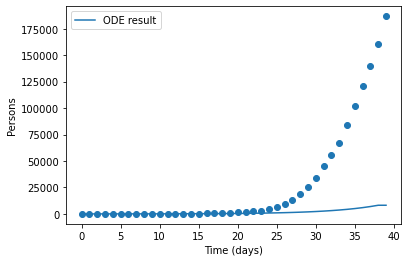

In [36]:

beta = betas
D = ds

#us_death = [0., 0., 0., 0., 1., 3., 8., 10., 13., 16., 17., 18., 23., 24., 26., 31., 39., 41., 51., 61., 73., 99., 122., 153., 209., 276., 349., 471., 599., 803., 1061., 1318., 1720., 2202., 2578., 3186., 4090.]

def sim_fun_ODE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      S[l] = S[l] - beta*I[l]/N*S[l]*dt
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt
    S[l+1] = S[l]
    I[l+1] = I[l]
  return S, I

def sim_fun_SDE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      noise_matrix = np.matrix([[beta*I[l]*S[l]/N,-beta*I[l]*S[l]/N],[-beta*I[l]*S[l]/N, beta*I[l]*S[l]/N + I[l]/D]])
      normal_noise = np.matmul(la.sqrtm(noise_matrix), np.random.normal((1,2)))
      S[l] = S[l] - beta*I[l]/N*S[l]*dt + np.sqrt(dt)*normal_noise[0]
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt + np.sqrt(dt)*normal_noise[1]
    S[l+1] = S[l]
    I[l+1] = I[l]
    return S, I
length = 40

N = p    # population size

int_steps = 1
plt.scatter(y=i,x=range(0,len(i),1))
S_ODE, I_ODE = sim_fun_ODE(s,i,beta, N, D, int_steps, length)
S_SDE, I_SDE = sim_fun_SDE(s,i,beta, N, D, int_steps, length)
plt.plot(I_ODE,label='ODE result')
#plt.plot(I_SDE,label='SDE result')

plt.xlabel('Time (days)')
plt.ylabel('Persons')
plt.legend()


##beta = 0.3                  # infection rate
#D = 7                   # average duration of the infection
#N = 300000000.0/10000.0     # population size


plt.show()

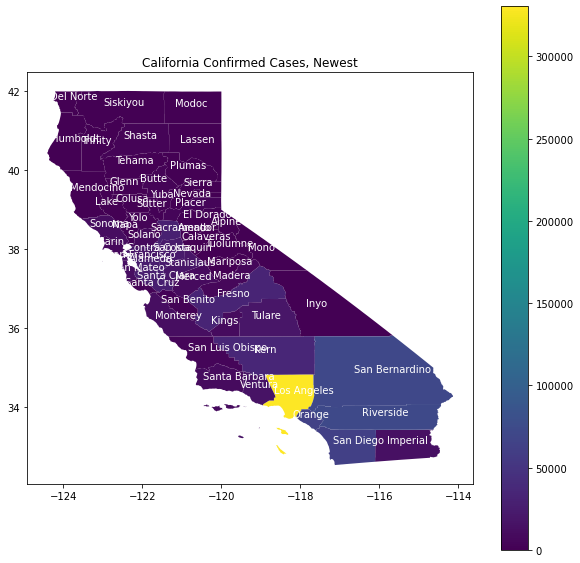

In [168]:
import geopandas

us = geopandas.read_file("/home/caw062/template/data/county_boundary/cb_2018_us_county_500k.shp")
us_confirmed_df["GEOID"] = us_confirmed_df["UID"].apply(lambda x:str(x)[3:])
merged = us_confirmed_df.merge(us,on="GEOID",how="left")
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])
map1 = gdf.loc[gdf["Province_State"] == "California"].plot(column = "11/12/20",
                                                    figsize = (10,10),legend = True)
centers = gdf.centroid
points_gdf = gdf.copy()
points_gdf["geometry"] = centers
ca_points = points_gdf.loc[points_gdf["Province_State"] == "California"]
plt.title("California Confirmed Cases, Newest")
for x, y, label in zip(ca_points.geometry.x, ca_points.geometry.y, ca_points["Admin2"]):
    map1.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

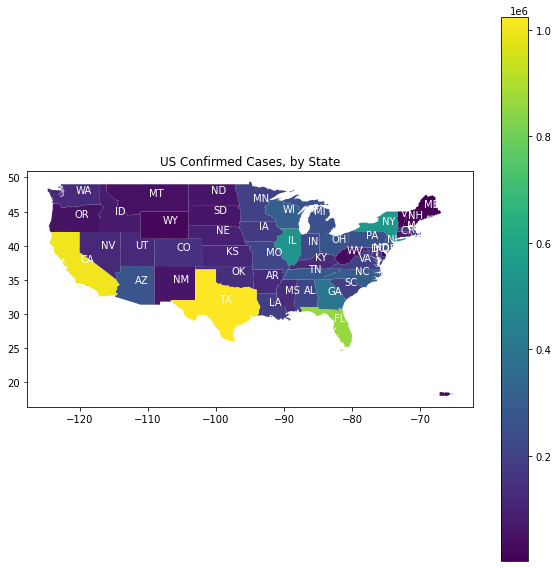

In [200]:
import geopandas
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Long_ < -50]
states = geopandas.read_file("/home/caw062/template/data/state_boundary/cb_2018_us_state_500k.shp")
us_confirmed_df["STATEFP"] = us_confirmed_df["UID"].apply(lambda x:str(x)[3:5])
us_confirmed_df_by_state = us_confirmed_df.groupby("STATEFP").agg({"11/12/20":"sum"})
merged = us_confirmed_df_by_state.merge(states,on="STATEFP",how="left").dropna()
merged = merged.loc[~merged["STUSPS"].isin(["HI","AK"])]
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])

centers = gdf.centroid
points_gdf = gdf.copy()
points_gdf["geometry"] = centers

map1 = gdf.plot(column = "11/12/20",figsize = (10,10),legend = True)
plt.title("US Confirmed Cases, by State")
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf["STUSPS"]):
    map1.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

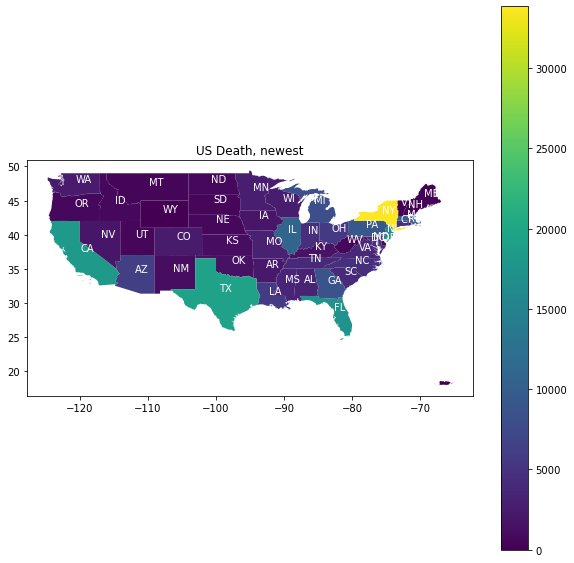

In [203]:
import geopandas
us_death_df = us_death_df.loc[us_death_df.Long_ < -50]
states = geopandas.read_file("/home/caw062/template/data/state_boundary/cb_2018_us_state_500k.shp")
us_death_df["STATEFP"] = us_death_df["UID"].apply(lambda x:str(x)[3:5])
us_death_df_by_state = us_death_df.groupby("STATEFP").agg({"11/12/20":"sum"})
merged = us_death_df_by_state.merge(states,on="STATEFP",how="left").dropna()
merged = merged.loc[~merged["STUSPS"].isin(["HI","AK"])]
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])
map3 = gdf.plot(column = "11/12/20",figsize = (10,10),legend = True)
plt.title("US Death, newest")
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf["STUSPS"]):
    map3.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

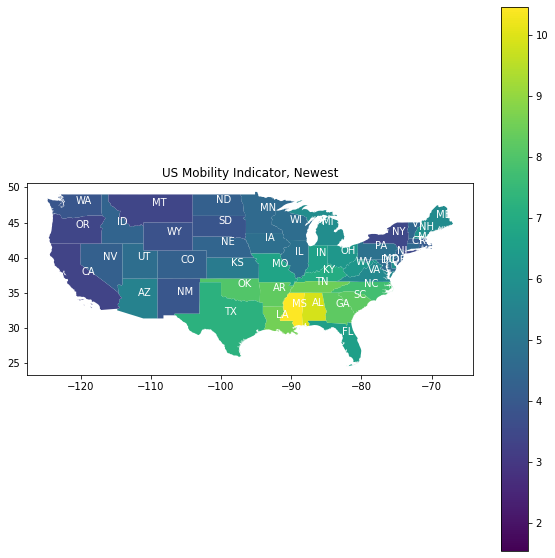

In [225]:
states = geopandas.read_file("/home/caw062/template/data/state_boundary/cb_2018_us_state_500k.shp")
mobility_by_state = mobility.loc[mobility.admin_level == 1].rename({"admin1":"NAME"},axis = 1)

merged = mobility_by_state.merge(states,on="NAME",how="left")
merged = merged.loc[~merged["STUSPS"].isin(["HI","AK"])]
gdf = geopandas.GeoDataFrame(
    merged, geometry=merged["geometry"])
map4 = gdf.plot(column = "2020-11-10",figsize = (10,10),legend = True)
plt.title("US Mobility Indicator, Newest")
for x, y, label in zip(points_gdf.geometry.x, points_gdf.geometry.y, points_gdf["STUSPS"]):
    map4.annotate(label, xy=(x-0.5, y), xytext=(2, 2), textcoords="offset points",color = "White")

[658]
[658, 189]
[658, 189, 1112]
[658, 189, 1112, 1403]
[658, 189, 1112, 1403, 3013]


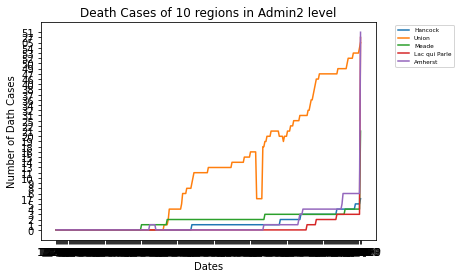

<Figure size 1440x1080 with 0 Axes>

In [235]:
import numpy as np
import scipy.linalg as la
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import random
fontP = FontProperties()
fontP.set_size('xx-small')

def death_multi_plot(n, df, level, start_date= '1/22/20'):
    '''
    n: number of regions
    df: Dataframe of death cases
    level: region level: admin2/ province/ state
    '''
    randomlist = []
    for i in range(0,n):
        n = random.randint(0,df.shape[0])
        randomlist.append(n)
        print(randomlist)
    for j in randomlist:
        target_j = df.loc[j,:]
        targetj_dth_info= target_j[start_date:]
        target_region = str(target_j[level])
        yj= list (targetj_dth_info)
        xj = list (targetj_dth_info.index)
        plt.plot(xj, yj, label=target_region)
    plt.xlabel('Dates')
    plt.ylabel('Number of Dath Cases')
    plt.title('Death Cases of 10 regions in '+ level+ ' level')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
    plt.figure(figsize=[20,15])
    plt.show()
    return
death_multi_plot(5,us_death_df,"Province")

In [206]:
import nbformat as nbf

nb = nbf.v4.new_notebook()
text = """\
# My first automatic Jupyter Notebook
This is an auto-generated notebook."""

code = """\
%pylab inline
hist(normal(size=2000), bins=50);
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_confirmed_df = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
us_death_df = pd.read_csv(url, error_bad_lines=False)

display(us_confirmed_df.head())
display(us_death_df.head())

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
global_recover_df = pd.read_csv(url, error_bad_lines=False)
display(global_recover_df.head())


url = "https://raw.githubusercontent.com/descarteslabs/DL-COVID-19/master/DL-us-m50.csv"
mobility = pd.read_csv(url, error_bad_lines=False)
display(mobility.head())
us_confirmed_df = us_confirmed_df.loc[us_confirmed_df.Admin2 != "Unassigned"]
us_death_df = us_death_df.loc[us_death_df.Admin2 != "Unassigned"]

"""

nb['cells'] = [nbf.v4.new_markdown_cell(text),
               nbf.v4.new_code_cell(code)]
fname = 'test.ipynb'

with open(fname, 'w') as f:
    nbf.write(nb, f)

In [148]:
ca = points_gdf.loc[points_gdf.Province_State == "California"]

## Forecasting 
- After finding the most likely parameters, we can generate future forecasting from the parameters. 

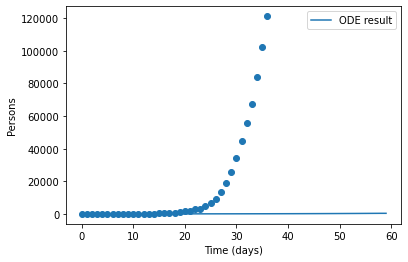

In [236]:


#us_death = [0., 0., 0., 0., 1., 3., 8., 10., 13., 16., 17., 18., 23., 24., 26., 31., 39., 41., 51., 61., 73., 99., 122., 153., 209., 276., 349., 471., 599., 803., 1061., 1318., 1720., 2202., 2578., 3186., 4090.]

def sim_fun_ODE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      S[l] = S[l] - beta*I[l]/N*S[l]*dt
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt
    S[l+1] = S[l]
    I[l+1] = I[l]
  return S, I

def sim_fun_SDE(s,i,beta, N, D, int_steps, length):
  S = np.zeros(length)
  I = np.zeros(length)
  S[0] = s[0]
  I[0] = i[0]
  dt = 1.0/int_steps
  for l in range(length-1):
    for i in range(int_steps):
      noise_matrix = np.matrix([[beta*I[l]*S[l]/N,-beta*I[l]*S[l]/N],[-beta*I[l]*S[l]/N, beta*I[l]*S[l]/N + I[l]/D]])
      normal_noise = np.matmul(la.sqrtm(noise_matrix), np.random.normal((1,2)))
      S[l] = S[l] - beta*I[l]/N*S[l]*dt + np.sqrt(dt)*normal_noise[0]
      I[l] = I[l] + (-I[l]/D + beta*I[l]/N*S[l])*dt + np.sqrt(dt)*normal_noise[1]
    S[l+1] = S[l]
    I[l+1] = I[l]
    return S, I
length = 60

beta = 0.0609266174999754
D = 145.8343055068469
N = p    # population size

int_steps = 20
plt.scatter(y=i,x=range(0,len(i),1))
S_ODE, I_ODE = sim_fun_ODE(s,i,beta, N, D, int_steps, length)
S_SDE, I_SDE = sim_fun_SDE(s,i,beta, N, D, int_steps, length)
plt.plot(I_ODE,label='ODE result')
#plt.plot(I_SDE,label='SDE result')

plt.xlabel('Time (days)')
plt.ylabel('Persons')
plt.legend()


##beta = 0.3                  # infection rate
#D = 7                   # average duration of the infection
#N = 300000000.0/10000.0     # population size


plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

overflow encountered in double_scalars

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning:

invalid value encountered in double_scalars



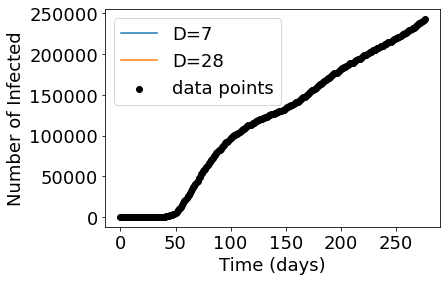

<Figure size 432x288 with 0 Axes>

In [240]:


# simulations of the ODE/SDE SIR model:
length = 150
int_steps = 20
N = 300000000.0/10000.0     # population size

# D = 5.0                    # average duration of the infection
D = 7.0*0.7                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_5, I_ODE_5 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

D = 7.0                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_7, I_ODE_7 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

# D = 10.0                    # average duration of the infection
D = 7.0*1.2                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_10, I_ODE_10 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)


D = 1.0/( 1.0/(7.0*0.7) - 1.0/7.0 + 1.0/28.0 )                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_20, I_ODE_20 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

D = 28.0                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_28, I_ODE_28 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)

D = 1.0/( 1.0/28.0-1.0/7.0+1.0/(7.0*1.2) )                    # average duration of the infection
beta = 0.26 + 1.0/D         # infection rate
S_ODE_30, I_ODE_30 = sim_fun_ODE(s,i,beta, N, D, int_steps, length)


fig, ax = plt.subplots()
x= np.linspace(1.0, 150.0, 150)
ax.plot(x, I_ODE_7, label='D=7')
ax.plot(x, I_ODE_28, label='D=28')
ax.scatter(range(0,len(us_death)-19,1), us_death[19:], color = 'black', marker = 'o', label='data points')
ax.fill_between(x, I_ODE_5, I_ODE_10, color='b', alpha=0.1)
ax.fill_between(x, I_ODE_20, I_ODE_30, color='r', alpha=0.1)
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Number of Infected', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.show()
plt.savefig("epi_comp.eps")